##### 0.1. We import all the needed libraries.

In [34]:
from matplotlib import pyplot as plt
from scipy import stats
from tkinter import *
import numpy as np
import pandas as pd
import fitter as ft
import seaborn as sns
import dtale
import os

##### 0.2. We will set some global settings for some modules.

In [35]:
%matplotlib ipympl
sns.set_style('white')
pd.options.mode.chained_assignment = None

##### 0.3. import the data file as a pandas dataframe

In [36]:
# importing data from file
data_path = os.path.join(os.getcwd(), 'Data\\banking_customer_info.csv')
customer_data_raw = pd.read_csv(data_path)

# setting ID column as index and sorting the data by ID
customer_data_raw.set_index('ID')
customer_data_raw.sort_index()

,ID,income,debt 1,debt 2,credit,age,edu,exp,red,loyalty
0,1,176.0,9.3,5.008608,11.359392,81.0,3.0,17,12,1
1,2,31.0,17.3,4.000798,1.362202,27.0,1.0,10,6,0
2,3,NaN,5.5,2.168925,0.856075,40.0,1.0,15,7,0
3,4,120.0,2.9,NaN,2.658720,41.0,NaN,15,14,0
4,5,28.0,17.3,3.056564,1.787436,24.0,2.0,2,0,1
...,...,...,...,...,...,...,...,...,...,...
695,696,27.0,4.6,0.979938,0.262062,36.0,2.0,6,15,1
696,697,21.0,11.5,2.045505,0.369495,29.0,2.0,6,4,0
697,698,32.0,7.6,1.940736,0.491264,33.0,1.0,15,3,0
698,699,77.0,8.4,4.165392,2.302608,45.0,1.0,19,22,0


### 1. Managing the outliers

##### 1.1. Analyzing the data

→ Dtale tool:

In [37]:
# for further optional analysis of the initial data
dtale.show(customer_data_raw)

Histogram of all the features (to get a visualization of their distribution):

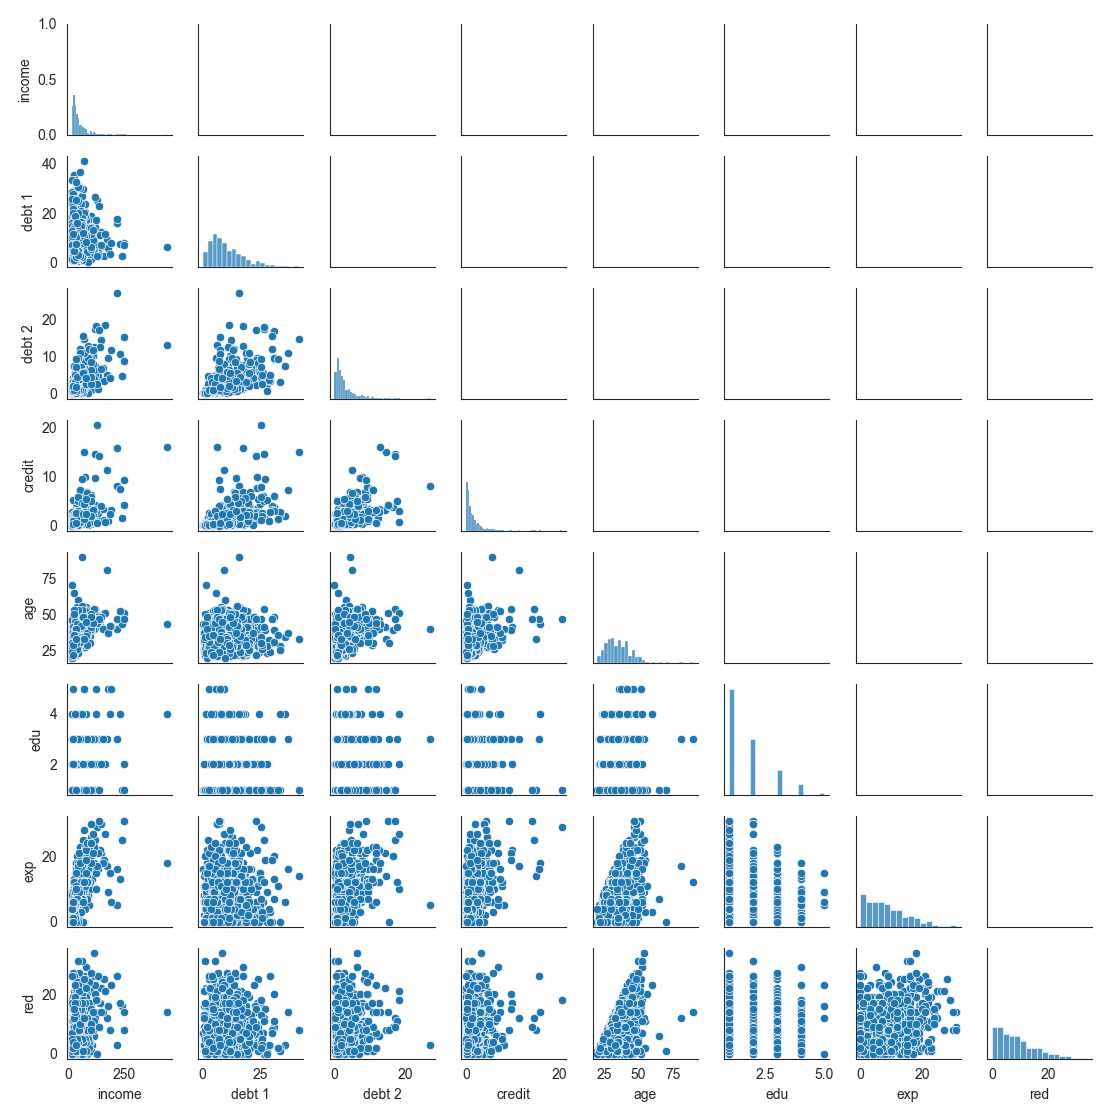

In [38]:
# eliminating ID and loyalty columns from the plot
cols_to_plot = customer_data_raw.columns[1:-1]

# creating the figure to see relationship between differect columns and each feature's distribution
fgrid = sns.PairGrid(customer_data_raw[cols_to_plot], height=1.4)
fgrid.map_diag(sns.histplot)
fgrid.map_lower(sns.scatterplot)

plt.show()

##### 1.2. Managing outliers of normally distributed features: 'debt1' and 'age' using z-score

In [39]:
# making a subset of the dataframe containing the normally distributed columns
normal_data_cols = customer_data_raw[['debt 1', 'age']]

# calculating z-score of the columns
z_score = np.abs(normal_data_cols.apply(stats.zscore, nan_policy='omit'))

# detecting outliers and their index in the dataset
debt1_outliers = np.where(z_score['debt 1'] > 3)
age_outliers = np.where(z_score['age'] > 3)

# setting all the outliers as missing values to be dealt with in later steps
customer_data_raw['debt 1'].loc[debt1_outliers] = np.nan
customer_data_raw['age'].loc[age_outliers] = np.nan

##### 1.3. Managing outliers of other features using IQR

In [40]:
# creating a subset of the data that contains non-normal features
non_normal_data = customer_data_raw[['income', 'debt 2', 'credit', 'exp', 'red']]

# finding the IQR for each feature
data_1st = non_normal_data.quantile(q=0.25)
data_3rd = non_normal_data.quantile(q=0.75)
data_IQR = data_3rd - data_1st

# finding the boundaries for the values of each feature
upper_bounds = data_3rd + 2.5 * data_IQR
lower_bounds = data_1st - 2.5 * data_IQR

# detecting outliers for each column
income_outliers = np.where((non_normal_data['income'] > upper_bounds['income'])
                        | (non_normal_data['income'] < lower_bounds['income']))
debt2_outliers = np.where((non_normal_data['debt 2'] > upper_bounds['debt 2'])
                        | (non_normal_data['debt 2'] < lower_bounds['debt 2']))
credit_outliers = np.where((non_normal_data['credit'] > upper_bounds['credit'])
                        | (non_normal_data['credit'] < lower_bounds['credit']))
exp_outliers = np.where((non_normal_data['exp'] > upper_bounds['exp'])
                        | (non_normal_data['exp'] < lower_bounds['exp']))
red_outliers = np.where((non_normal_data['red'] > upper_bounds['red'])
                        | (non_normal_data['red'] < lower_bounds['red']))

# setting outliers as missing values to be dealt with later
customer_data_raw['income'].loc[income_outliers] = np.nan
customer_data_raw['debt 2'].loc[debt2_outliers] = np.nan
customer_data_raw['credit'].loc[credit_outliers] = np.nan
customer_data_raw['exp'].loc[exp_outliers] = np.nan
customer_data_raw['red'].loc[red_outliers] = np.nan

<span style="color:red">NOTE:</span> the column 'edu' was skipped since it is a ordinal categorical data

### 2. Managing missing values